In [2]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import text_recognizer
except ImportError:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import FsdlHandwritingDataset
from text_recognizer import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dataset = FsdlHandwritingDataset()
dataset.load_or_generate_data()
print(dataset)

100%|██████████| 4/4 [00:00<00:00,  2.35it/s]

FSDH Handwriting Dataset
Num pages: 4



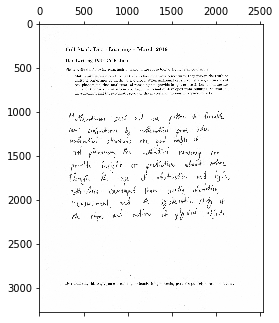

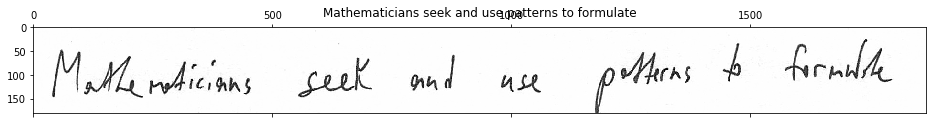

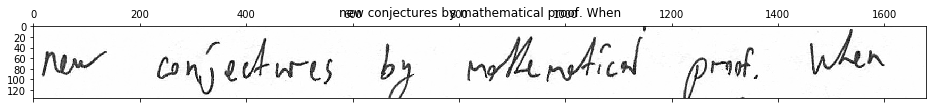

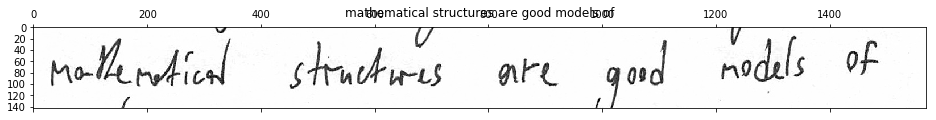

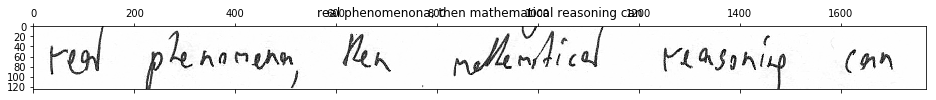

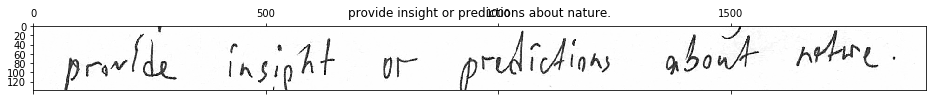

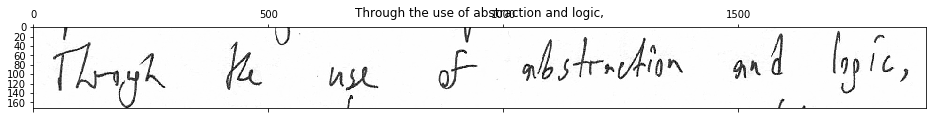

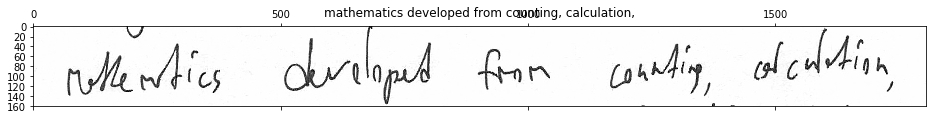

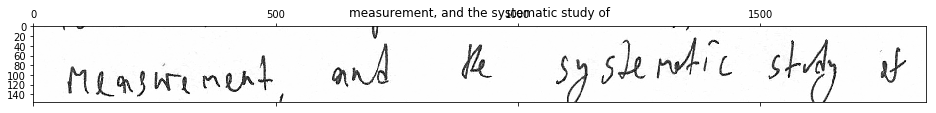

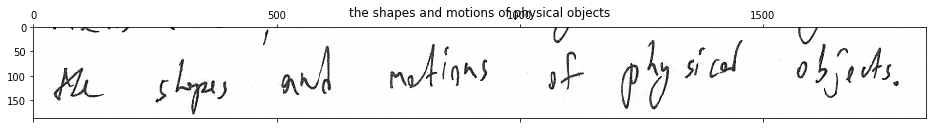

In [17]:
PAGES_DIRNAME = dataset.data_dirname() / 'raw' / 'fsdl_handwriting' / 'pages'

ids = list(dataset.line_regions_by_id.keys())
id_ = ids[1]

page_image = util.read_image(PAGES_DIRNAME / id_, grayscale=True)
plt.matshow(page_image, cmap='gray')

line_regions = dataset.line_regions_by_id[id_]
strings = dataset.line_strings_by_id[id_]

for line_region, string in zip(line_regions, strings):
    line_image = page_image[line_region['y1']:line_region['y2'], line_region['x1']:line_region['x2']]
    plt.matshow(line_image, cmap='gray')
    plt.title(string)